## Linear Regression

In [177]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
from sklearn.datasets import load_boston
boston = load_boston()

In [157]:
# The boston variable is a Dictionary
# Quickly check the Key values to get a sense of the data
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [158]:
# we observe 506 rows and 13 columns
print('Rows and Columns:')
print(boston.data.shape)
print('-' * 20)
# we can observe the feature_names or column names 
print('Column Names:')
print(boston.feature_names)

Rows and Columns:
(506, 13)
--------------------
Column Names:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [159]:
# Display a description of the data set 
# the MEDV attribute is usually the target (the variable we are trying to predict)
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [160]:
# now lets create a pandas dataframe 
boston_df = pd.DataFrame(boston.data)

# we need to embed the column names into the dataframe as the column names are the feature_names
boston_df.columns = boston.feature_names

# Finally, display the dataframe
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [161]:
# the target attribute is the price associated with each row for the boston house dataset
# here we observe the number of rows
boston.target.shape

(506,)

In [162]:
# rename the target attribute in the original boston dataset as 'PRICE' and add this column to the boston_df dataset
boston_df['PRICE'] = boston.target

# check to see the addition of the new price column
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [163]:
# brief summary of the statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [164]:
# Split, train, and test 
# we are predicitng the boston house price 
# using all the features to make this prediciton 

In [165]:
# all other features
X = boston_df.drop('PRICE', axis = 1)

# boston housing price
Y = boston_df['PRICE']

In [166]:
# split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print('X information')
print(X_train.shape)
print(X_test.shape)
print('-'*20)
print('Y information')
print(Y_train.shape)
print(Y_test.shape)

X information
(339, 13)
(167, 13)
--------------------
Y information
(339,)
(167,)


Text(0.5,1,'Prices vs Predicted prices')

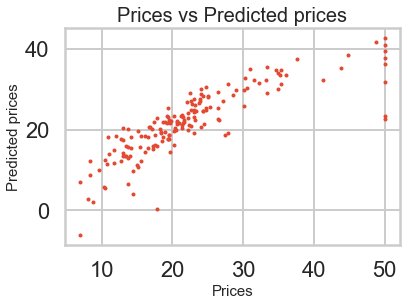

In [176]:
# now lets run linear regression

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred, s = 4)
plt.xlabel("Prices", fontsize= 15)
plt.ylabel("Predicted prices", fontsize= 15)
plt.title("Prices vs Predicted prices", fontsize= 20)


In [168]:
# Calculate the mean squared error to determine how well the model works
# the error value is high, therefore the model isn't the best
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.530458765974654
